In [1]:
from set_eye_tracking_cooking_recipes.entities.test_data import TestData

test_data = TestData("../data/test_data/0_Christoph_Haerdl.tsv")

C:\Users\micha\studium\git-studium\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:45: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


In [2]:
print(test_data.get_aoi_times())

([[(0, 235), (1, 69), (0, 37), (6, 43), (7, 6140), (5, 2021), (7, 419)], [(0, 43), (5, 28), (0, 512), (5, 3621), (6, 120), (5, 67), (7, 3874)], [(0, 211), (5, 26), (0, 186), (5, 2640), (0, 133), (5, 21), (0, 23), (5, 1321), (6, 87), (7, 3378)], [(0, 31), (5, 42), (0, 59), (5, 57), (0, 166), (5, 3767), (7, 4864)], [(6, 66), (0, 604), (5, 3887), (6, 66), (7, 4244)], [(0, 260), (5, 663), (0, 38), (5, 448), (6, 220), (7, 3914), (0, 318), (5, 2056)], [(0, 250), (5, 1849), (0, 76), (5, 1669), (6, 278), (7, 83), (0, 17), (7, 80), (6, 98), (0, 112), (7, 2231)], [(0, 139), (5, 51), (0, 100), (5, 2034), (6, 40), (7, 6244), (6, 176)], [(0, 39), (5, 25), (0, 585), (5, 2497), (6, 339), (7, 5586)], [(0, 292), (5, 274), (0, 37), (5, 389), (0, 103), (5, 482), (6, 120), (7, 4327), (5, 934), (6, 62), (0, 227)]], [659, 0, 0, 0, 0, 2079, 182, 4327])


In [28]:
import numpy as np
import pandas as pd

rows_with_one = np.any(test_data.aois_semmeln == 1, axis=1)

filtered_timestamps = test_data.recording_timestamp[rows_with_one]
filtered_array = test_data.aois_semmeln[rows_with_one]

df = pd.DataFrame(filtered_array, columns=[f'Column_{i+1}' for i in range(filtered_array.shape[1])])
df['Timestamps'] = filtered_timestamps

column_sums = df.sum()

print(column_sums)



Column_1      5.560000e+02
Column_2      0.000000e+00
Column_3      0.000000e+00
Column_4      0.000000e+00
Column_5      0.000000e+00
Column_6      4.012000e+03
Column_7      8.800000e+01
Column_8      3.379000e+03
Timestamps    3.228754e+12
dtype: float64


In [32]:
previous_aoi_id = df.iloc[0][:8].idxmax()
first_timestamp = df.iloc[0]["Timestamps"]

aoi_times = []

for index, row in df.iterrows():
    current_aoi_id = row[:8].idxmax()
    if current_aoi_id == previous_aoi_id:
        pass
    else:
        aoi_times.append((previous_aoi_id, row["Timestamps"]-first_timestamp))

        previous_aoi_id = current_aoi_id
        first_timestamp = row["Timestamps"]

aoi_times

    

Column_1
Column_6
Column_1
Column_6
Column_1
Column_6
Column_1
Column_6
Column_7


[('Column_1', 893333.0),
 ('Column_6', 116668.0),
 ('Column_1', 873352.0),
 ('Column_6', 10546700.0),
 ('Column_1', 516669.0),
 ('Column_6', 93332.0),
 ('Column_1', 406668.0),
 ('Column_6', 4873352.0),
 ('Column_7', 2670000.0)]

In [106]:
import numpy as np

rows_with_one = np.any(test_data.aois_semmeln == 1, axis=1)

filtered_array = test_data.aois_semmeln[rows_with_one]

previous_aoi_id = np.argmax(filtered_array[0,:])
counter = 0

aoi_times = []

for row in filtered_array:
    current_aoi_id = np.argmax(row)
    if current_aoi_id == previous_aoi_id:
        counter = counter + 1
    else:
        aoi_times.append((previous_aoi_id, counter))

        previous_aoi_id = current_aoi_id
        counter = 0
aoi_times.append((current_aoi_id, counter))

print(aoi_times)


# Create a new list with zeros at each index
result_list = [0] * (max(idx for idx, _ in aoi_times) + 1)

# Sum the values for the specific index and insert it to the new list
for index, value in aoi_times:
    result_list[index] += value

print(result_list)

[(6, 23), (5, 18), (0, 813), (1, 572), (2, 162), (3, 70), (2, 198), (3, 88), (4, 44), (5, 5751), (7, 47), (6, 58), (7, 45), (6, 530)]
[813, 572, 360, 158, 44, 5769, 611, 92]


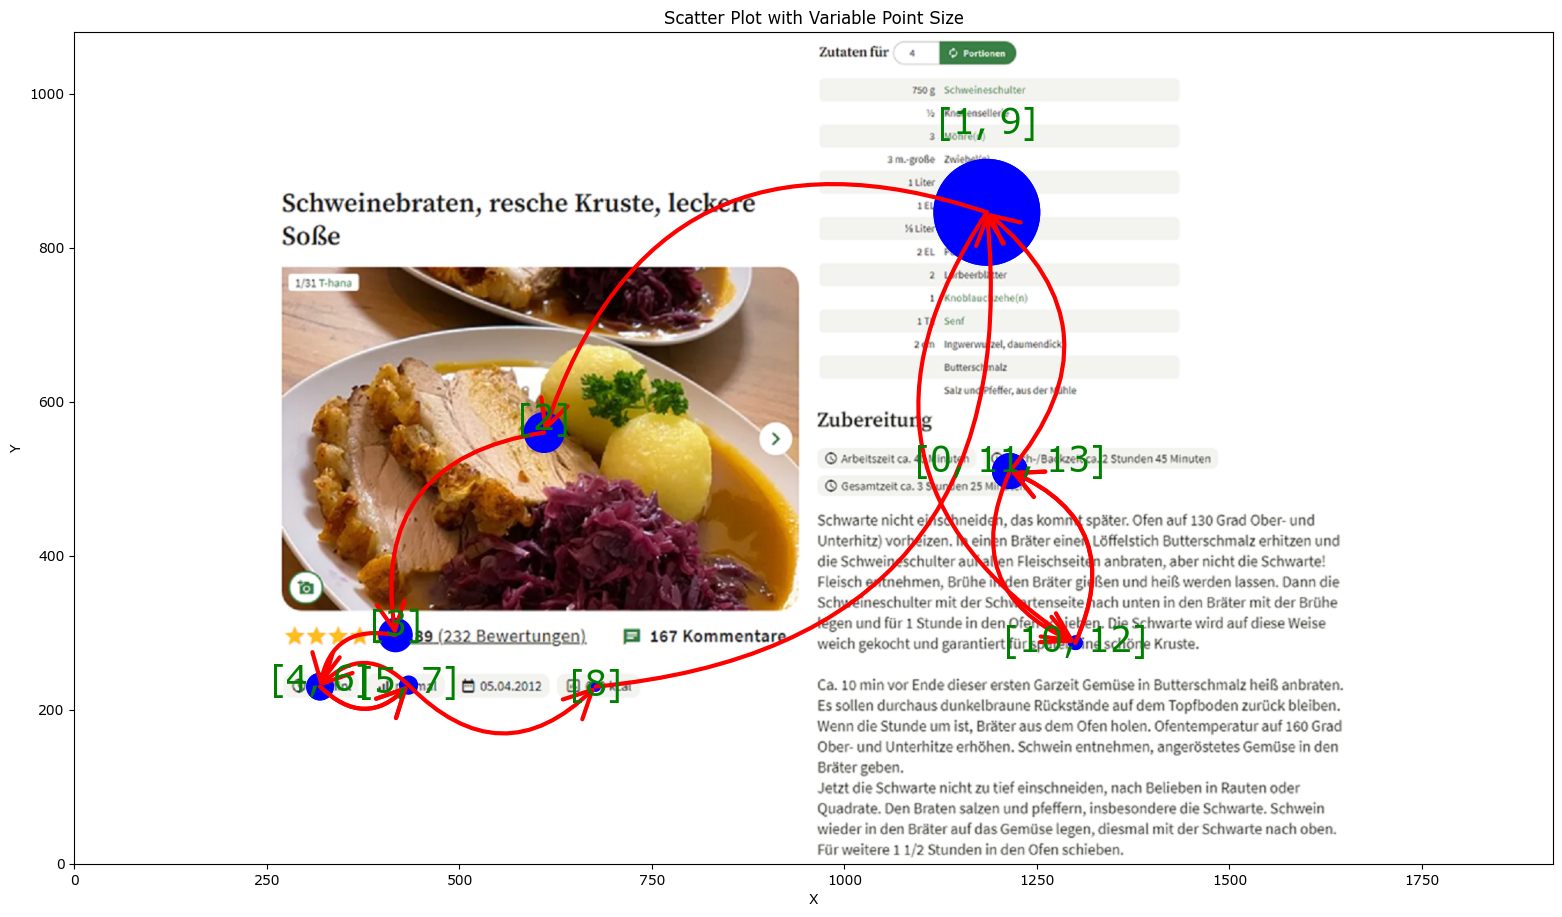

In [107]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import ConnectionPatch

coordinates_of_aoi = [(610,520), (417,783), (319,850), (434,848), (677,850), (1185, 234), (1215, 570), (1300, 793)]

# Sample data
x = []
y = []
point_sizes = []

for aoi in aoi_times:
    x.append(coordinates_of_aoi[aoi[0]][0])
    y.append(coordinates_of_aoi[aoi[0]][1])
    point_sizes.append(total_visit_time_per_aoi[aoi[0]])


img = mpimg.imread("../data/stimuli/schweinebraten.png")

_, ax = plt.subplots(figsize=(img.shape[1]/100, img.shape[0]/100))
ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
inverted_y = img.shape[0] - np.array(y)
# Create a scatter plot with point sizes based on the values in point_sizes
ax.scatter(x, inverted_y, s=point_sizes, color='blue', alpha=1.0)

def find_indices(lst, target_id):
    return [index for index, (id, _) in enumerate(lst) if id == target_id]

def get_first_id(target_id, data_list):
    for index, (first_id, _) in enumerate(data_list):
        if first_id == target_id:
            return index

ids_in_aoi_times = {item[0] for item in aoi_times}
# Add text labels above each point
for aoi_id in ids_in_aoi_times:
    text_offset = point_sizes[get_first_id(aoi_id, aoi_times)]/50.0
    ax.text(x[get_first_id(aoi_id, aoi_times)], inverted_y[get_first_id(aoi_id, aoi_times)] + text_offset, f'{find_indices(aoi_times, aoi_id)}', color='green', ha='center', va='center', fontsize=25)


for i in range(len(x) - 1):
    xyA = (x[i], inverted_y[i])
    xyB = (x[i + 1], inverted_y[i + 1])
    coordsA = "data"
    coordsB = "data"
    arrow = ConnectionPatch(xyA, xyB, coordsA, coordsB, arrowstyle='->', color='red', connectionstyle="arc3,rad=.5", mutation_scale=50, linewidth=3.0)
    ax.add_patch(arrow)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot with Variable Point Size')

# Show the plot
plt.show()

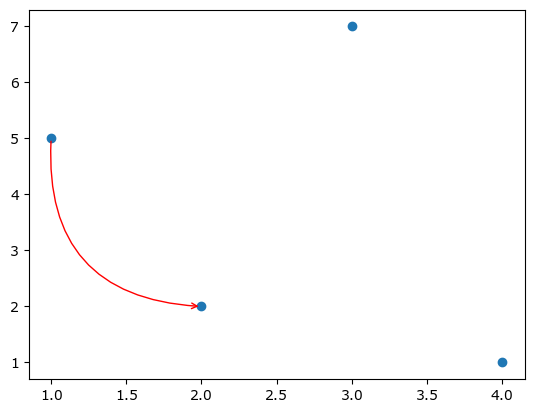

In [28]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4]
y = [5, 2, 7, 1]

# Create a scatter plot
plt.scatter(x, y)

# Add arrows between points (e.g., from point 1 to point 2)
arrowprops = dict(facecolor='red', edgecolor='red', arrowstyle='->', connectionstyle='arc3,rad=0.5')
plt.annotate('', xy=(2, 2), xytext=(1, 5), arrowprops=arrowprops)

# Add arrows for other points as needed

# Show the plot
plt.show()


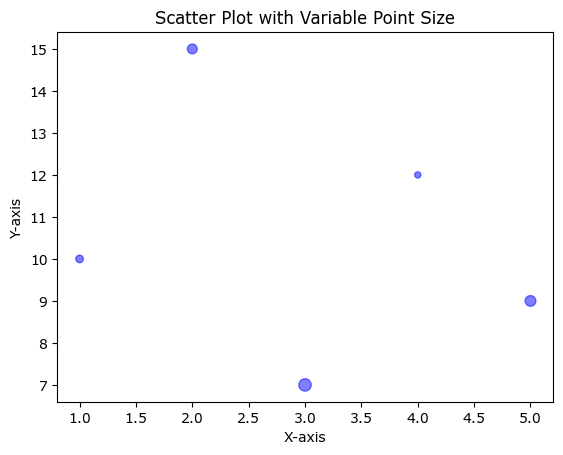

In [29]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 9]
point_sizes = [30, 50, 80, 20, 60]  # Corresponding point sizes

# Create a scatter plot with point sizes based on the values in point_sizes
plt.scatter(x, y, s=point_sizes, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Variable Point Size')

# Show the plot
plt.show()


In [20]:
import pandas as pd

raw = test_data.raw

# Print column names where the column name contains "AOI"
aoi_columns = raw.columns[raw.columns.str.contains("AOI") & raw.columns.str.contains("pizza")]
#raw_filtered = raw.dropna(subset=aoi_columns, axis=1)


df_aois = raw[aoi_columns].dropna()
column_sums = df_aois.sum()

print(column_sums)

# Assuming df_aois is your original DataFrame
new_rows = []

for index, row in df_aois.iterrows():
    if (row > 0).any():
        new_rows.append(row)

# Creating a new DataFrame from the selected rows
new_df = pd.DataFrame(new_rows, columns=df_aois.columns)

# Resetting the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

new_df

AOI hit [pizza - calories]               0.0
AOI hit [pizza - duration]               0.0
AOI hit [pizza - easiness]               0.0
AOI hit [pizza - ingredients]         4012.0
AOI hit [pizza - picture]              564.0
AOI hit [pizza - preparation_text]    3379.0
AOI hit [pizza - preparation_time]      88.0
AOI hit [pizza - rating]                 0.0
dtype: float64


,AOI hit [pizza - calories],AOI hit [pizza - duration],AOI hit [pizza - easiness],AOI hit [pizza - ingredients],AOI hit [pizza - picture],AOI hit [pizza - preparation_text],AOI hit [pizza - preparation_time],AOI hit [pizza - rating]
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8040,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8041,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
import numpy as np

rows_with_one = np.any(test_data.aois_arab_pizza == 1, axis=1)

filtered_array = test_data.aois_arab_pizza[rows_with_one]

filtered_array.shape

np.sum(filtered_array, axis=0)

array([ 556.,    0.,    0.,    0.,    0., 4012.,   88., 3379.])